In [3]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train import train as train_ViTL16Model

from utils.show_graph import plot_history

In [2]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=20,
    learning_rate=1e-05,
    batch_size=4,
    flozen=True
)

[DEBUG] 2023-09-18 19:56:32 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-18 19:56:32 - Starting training on cuda at 2023-09-18 19:56:32
[DEBUG] 2023-09-18 19:56:32 - Model: VisionTransformer
[DEBUG] 2023-09-18 19:56:32 - Model parameters:
[DEBUG] 2023-09-18 19:56:32 - class_token: torch.Size([1, 1, 1024])
[DEBUG] 2023-09-18 19:56:32 - conv_proj.weight: torch.Size([1024, 3, 16, 16])
[DEBUG] 2023-09-18 19:56:32 - conv_proj.bias: torch.Size([1024])
[DEBUG] 2023-09-18 19:56:32 - encoder.pos_embedding: torch.Size([1, 1025, 1024])
[DEBUG] 2023-09-18 19:56:32 - encoder.layers.encoder_layer_0.ln_1.weight: torch.Size([1024])
[DEBUG] 2023-09-18 19:56:32 - encoder.layers.encoder_layer_0.ln_1.bias: torch.Size([1024])
[DEBUG] 2023-09-18 19:56:32 - encoder.layers.encoder_layer_0.self_attention.in_proj_weight: torch.Size([3072, 1024])
[DEBUG] 2023-09-18 19:56:32 - encoder.layers.encoder_layer_0.self_attention.in_proj_bias: torch.Size([3072])
[DEBUG] 2023-09-18 19:56:32 - encoder.laye

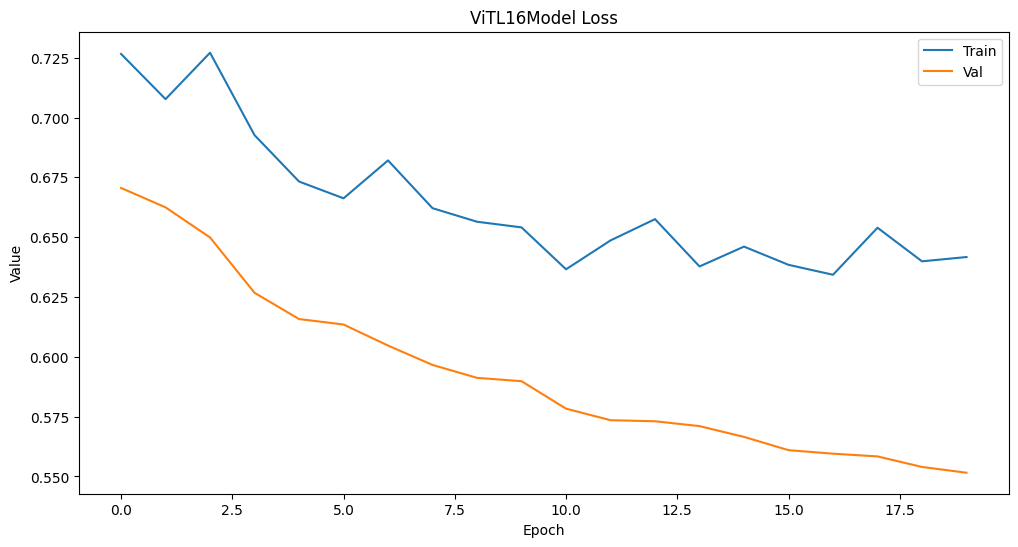

In [3]:
plot_history(loss_history, "ViTL16Model Loss")

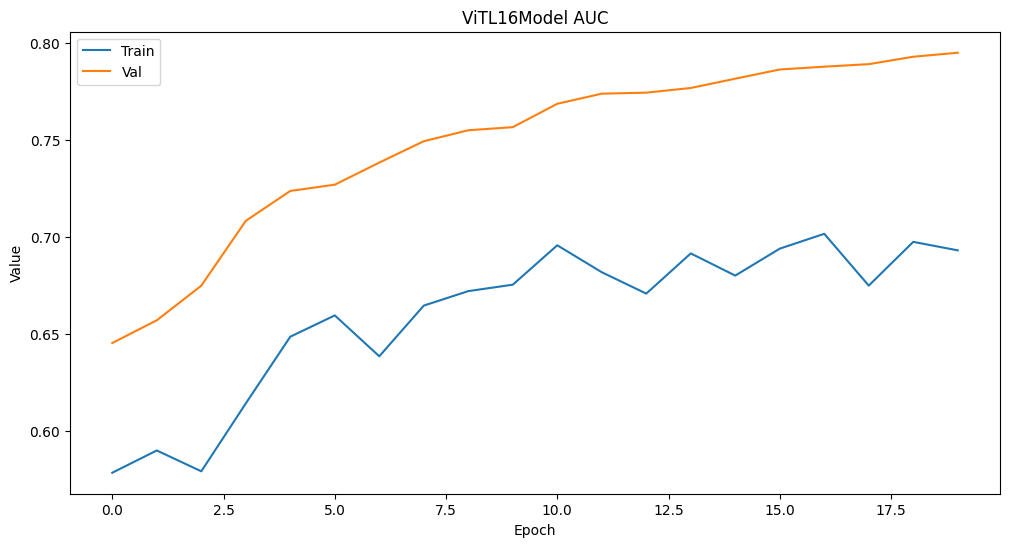

In [4]:
plot_history(auc_history, "ViTL16Model AUC")

In [4]:
from models.ViTL16Model.predict import predict as predict_ViTL16Model
import pandas as pd

sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

bast_auc_vitl16_model_paths = [
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_60_auc_0.8502.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_70_auc_0.8533.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_50_auc_0.8460.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_25_auc_0.8303.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model/visiontransformer_20230917010622_epoch_12_auc_0.8110.pth"
]
for index, best_auc_model_path in enumerate(bast_auc_vitl16_model_paths):
  _, y_pred = predict_ViTL16Model(
      model_path=best_auc_model_path,
      batch_size=4,
      seed=2023,
      use_tta=False
  )
  sample_submission[f'model_vitl16_{index}_2023'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)

sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_ensemble_202309182129_vitl16_12-70range.csv', index=False, header=False)

[DEBUG] 2023-09-18 21:51:15 - Starting prediction on cuda
[DEBUG] 2023-09-18 21:51:15 - Using TTA: False
[DEBUG] 2023-09-18 21:51:15 - TTA Transforms: <ttach.base.Compose object at 0x000001C5884DB550>
Prediction: 100%|██████████| 545/545 [02:25<00:00,  3.76it/s]
[DEBUG] 2023-09-18 21:53:41 - Finished prediction
[DEBUG] 2023-09-18 21:53:44 - Starting prediction on cuda
[DEBUG] 2023-09-18 21:53:44 - Using TTA: False
[DEBUG] 2023-09-18 21:53:44 - TTA Transforms: <ttach.base.Compose object at 0x000001C588587F90>
Prediction: 100%|██████████| 545/545 [02:23<00:00,  3.80it/s]
[DEBUG] 2023-09-18 21:56:08 - Finished prediction
[DEBUG] 2023-09-18 21:56:11 - Starting prediction on cuda
[DEBUG] 2023-09-18 21:56:11 - Using TTA: False
[DEBUG] 2023-09-18 21:56:11 - TTA Transforms: <ttach.base.Compose object at 0x000001C588557F50>
Prediction: 100%|██████████| 545/545 [02:23<00:00,  3.79it/s]
[DEBUG] 2023-09-18 21:58:34 - Finished prediction
[DEBUG] 2023-09-18 21:58:38 - Starting prediction on cuda
[DE